# Regressão Linear - Bolsa De Valores Americana
## Com Split de Dados - Versão 02
#### fonte de dados: https://finance.yahoo.com/
#### Ativos mais comercializados: https://finance.yahoo.com/screener/predefined/most_actives

### Nome: .... , Matricula: ...

In [1]:
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

## Leitura de dados

In [2]:
fb = pd.read_csv("fb2018.csv").set_index("Date")
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [3]:
fb.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,157.809998,159.199997,154.110001,155.389999,155.389999,36796000
2018-04-03,156.550003,157.389999,150.809998,156.110001,156.110001,42034000
2018-04-04,152.029999,155.559998,150.509995,155.100006,155.100006,49885600
2018-04-05,161.559998,161.570007,156.649994,159.339996,159.339996,41449600
2018-04-06,157.729996,161.419998,156.809998,157.199997,157.199997,41323600


In [4]:
print("Numero de Registros ou Tuplas: ", len(fb))

Numero de Registros ou Tuplas:  1480


In [5]:
1480/330

4.484848484848484

In [6]:
# converte o index para o tipo data
fb.index = pd.to_datetime(fb.index)
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [7]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2012-05-18 to 2018-04-06
Data columns (total 6 columns):
Open         1480 non-null float64
High         1480 non-null float64
Low          1480 non-null float64
Close        1480 non-null float64
Adj Close    1480 non-null float64
Volume       1480 non-null int64
dtypes: float64(5), int64(1)
memory usage: 80.9 KB


In [8]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1.480000e+03
mean,89.862601,90.773331,88.865433,89.860723,89.860723,3.730959e+07
std,48.652394,48.932057,48.319743,48.678628,48.678628,3.234154e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,49.670000,50.562499,48.709999,49.395002,49.395002,1.840070e+07
50%,81.299999,82.089996,80.650002,81.410000,81.410000,2.734440e+07
75%,124.132498,125.000000,123.632497,124.352499,124.352499,4.588272e+07
max,192.039993,195.320007,189.979996,193.089996,193.089996,5.735764e+08


## Preparacao do modelo 

In [10]:
olm = lm.LinearRegression()
X = numpy.array([x.toordinal() for x in fb.index])[:, numpy.newaxis]
y = fb['Close']
print(y[:5])

Date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
Name: Close, dtype: float64


## Aplicacao do modelo de regressao

In [11]:
olm.fit(X, y)
olm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predição

In [12]:
yp = [olm.predict(x.toordinal())[0] for x in fb.index]
yp[:3]

[6.836301229246601, 7.067829500949301, 7.145005591512017]

## Métrica para avaliar o modelo
R² - coeficiente de determinação. 
É uma métrica que mede os o quanto dos futuros examplos são previstos corretamente. <br />
Varia entre 1 e -1. Quanto mais o R² se aproximar de 1 ou -1, melhor a previsão. <br />
Um R² próximo de 0, não reflete o modelo.

In [13]:
from sklearn.metrics import r2_score
# aplicando a predicao - datas
y_pred = [olm.predict(x.toordinal())[0] for x in fb.index]

# Evaluate the model
r2 = r2_score(y, y_pred)
print('r2 = ', r2 )

r2 =  0.9664639352112533


## a reta de regressao

In [14]:
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = 0.07717609056774757 * x + -56689.8840495514


## Plota os modelo (Dados Observados x Dados Previstos)

Reta de Regressão: y = 0.07717609056774757 * x + -56689.8840495514


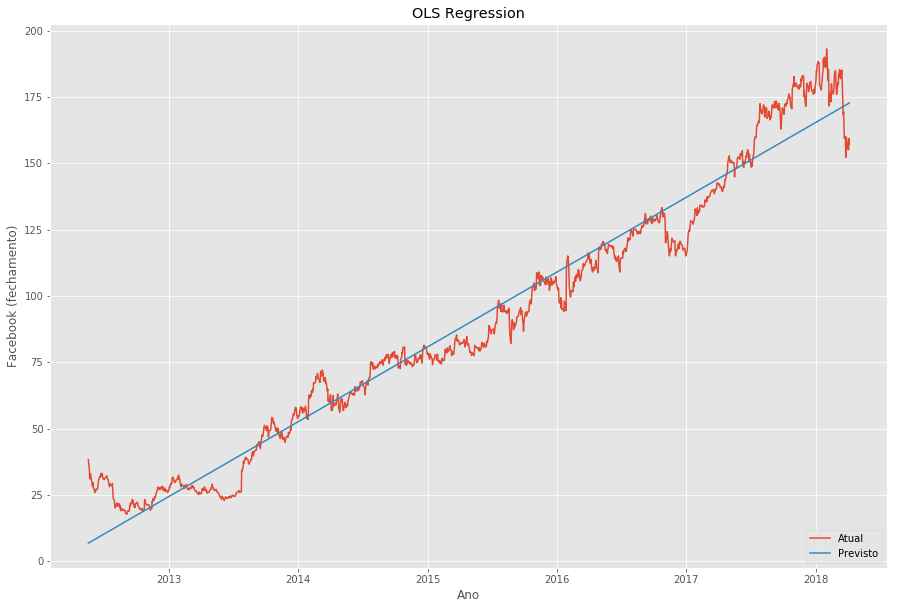

In [15]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, y_pred)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.savefig("fabebook-linregr.pdf")
print('Reta de Regressão: y = {0} * x + {1}'.format(a, b))
plt.show()

## previsao para os anos de 2019, 2020, ...

In [17]:
from datetime import datetime

data = "2019-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')
yp2019 = olm.predict(datetime_object.toordinal())
print ("previsao para ", data, " (fechamento) = us$ ", yp2019[0])

previsao para  2019-01-30  (fechamento) = us$  195.7633709390866


In [18]:
data = "2020-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')
yp2020 = olm.predict(datetime_object.toordinal())
print ("previsao para ", data, " (fechamento) = us$ ", yp2020[0])

previsao para  2020-01-30  (fechamento) = us$  223.9326439963188


In [19]:
data = "2025-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')
yp2025 = olm.predict(datetime_object.toordinal())
print ("previsao para ", data, " (fechamento) = us$ ", yp2025[0])

previsao para  2025-01-30  (fechamento) = us$  364.9333614635907


In [20]:
lucro = yp2025[0] / yp2019[0] * 100
print("diferenca ano 2025 - 2019 - Lucro da ação do Facebook (%) ->", "{:3.0f}%".format(lucro)  )

diferenca ano 2025 - 2019 - Lucro da ação do Facebook (%) -> 186%


# Regressão Linear - Usando conjuntos de treino/teste 

## Split aleatório de treino e teste

In [21]:
from IPython.display import Image
Image(url = 'images/split-de-dados-machine-learning.png')

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. Dividimos nossos dados originais em dados de treino e de teste. Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).
Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [34]:
from sklearn import model_selection
# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

Y = y
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)
# Criação do modelo
modelo = lm.LinearRegression()
modelo.fit(X_treino, Y_treino)
olm = modelo

# aplicando a predicao - datas
from sklearn.metrics import r2_score
y_pred = [olm.predict(x) for x in X_teste.ravel()]
# Evaluate the model
r2 = r2_score(Y_teste, y_pred)
print('r2 = ', r2 )

r2 =  0.9661838204844942


In [35]:
X_teste[:3].ravel()

array([736629, 736263, 735467])

## a reta de regressao

In [36]:
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = 0.0773116741106389 * x + -56789.45100298855


## Plota o modelo

Reta de Regressão Linear: y = 0.0773116741106389 * x + -56789.45100298855


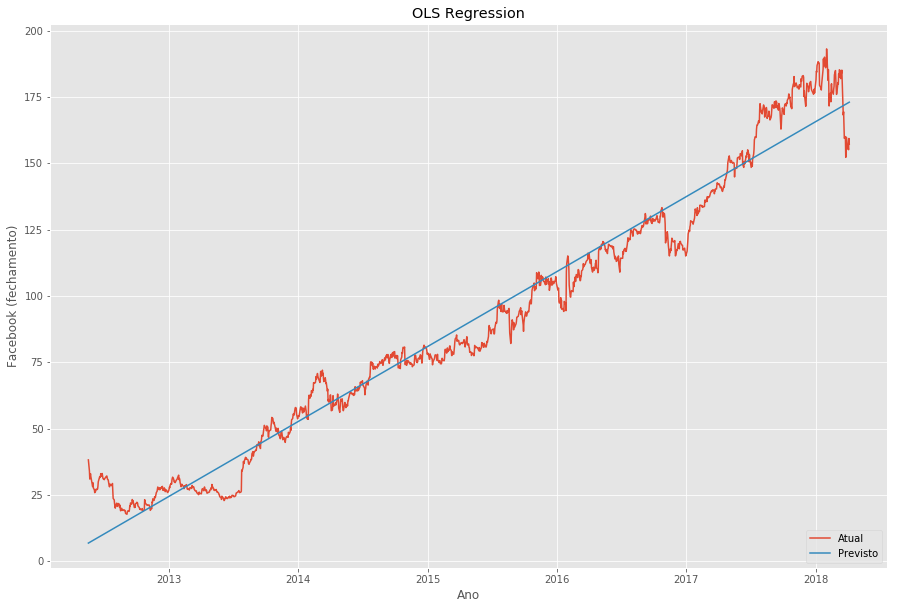

In [38]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

y_pred = [olm.predict(x.toordinal())[0] for x in fb.index]

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, y_pred)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.savefig("fabebook-linregr.pdf")

print('Reta de Regressão Linear: y = {0} * x + {1}'.format(a, b))

plt.show()

# Usando Validação Cruzada para Avaliar o modelo

In [40]:
from IPython.display import Image
Image(url = 'images/cross-validation.jpg')

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão (Eu disse que Estatística era importante no processo de Big Data Analytics). O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

In [41]:
# Definindo os valores para os folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

Y = y
# Criando o modelo
modelo = lm.LinearRegression()
modelo.fit(X,Y)
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia: %.3f%% (%.3f%%)" % (resultado.mean()*100.0, resultado.std() * 100.0))
print(resultado.mean())

Acurácia: 96.596% (0.294%)
0.9659633164998385


In [42]:
# aplicando a predicao - datas
olm = modelo
yp = [olm.predict(x.toordinal())[0] for x in fb.index]

## a reta de regressao

In [43]:
a = olm.coef_[0]
b = olm.intercept_
print("Modelo Cros-Validatinon")
print(' y = {0} * x + {1}'.format(a, b))

Modelo Cros-Validatinon
 y = 0.07717609056774757 * x + -56689.8840495514


In [44]:
print("Modelo de Split: ")
print(" y = 0.07118755997540646 * x + -52286.73808925971")

Modelo de Split: 
 y = 0.07118755997540646 * x + -52286.73808925971


Reta de Regressão: y = 0.07717609056774757 * x + -56689.8840495514


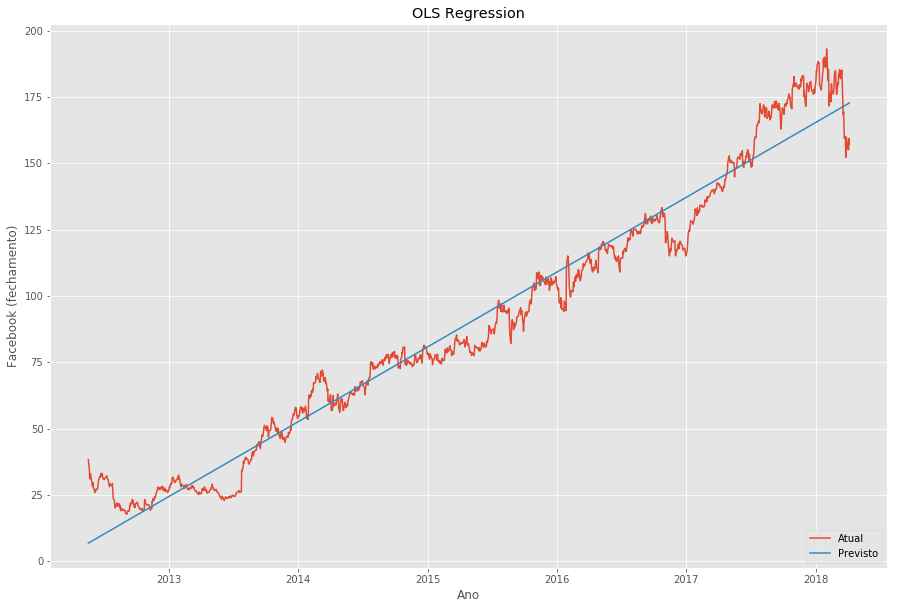

In [45]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, yp)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.savefig("fabebook-linregr.pdf")

print('Reta de Regressão: y = {0} * x + {1}'.format(a, b))
plt.show()